# Assignment 2 Example

*Last updated: 9/17/2019, Andrew Therriault*

This notebook gives an example of what a completed Week 2 assignment might look like.

## Setting up the environment


#### Setting the working directory

In [1]:
import os
os.chdir('c:/working/')

#### Importing numpy and pandas for analysis and setting display options for pandas

In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 1000
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

#### Importing seaborn and matplotlib for plotting 
Also invoking matplotlib inline cell magic so that all plots will display inline in the notebook (otherwise it only displays one at a time)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

# Loading Ohio voter file from TargetSmart
This is a 10% sample of the Ohio voter file, with several additional appends from TargetSmart (including their VoterBase demographics and model scores).

In [4]:
vf = pd.read_csv('ohio_voterfile_10pct.csv', low_memory=False)

## Exploring the dataset

#### Looking at the dimensions (rows, columns)

In [5]:
vf.shape

(760097, 159)

#### Looking at some sample records

In [6]:
vf.sample(5).T.astype(str)

,193937,728929,232322,735524,544988
voterbase_id,OH-000001878359,OH-000002704362,OH-000002123672,OH-10557322,OH-000004984672
tsmart_city,HOLLAND,CINCINNATI,PAINESVILLE,SHADE,CAMDEN
tsmart_state,OH,OH,OH,OH,OH
tsmart_zip,43528,45248,44077,45776,45311
vf_reg_cass_city,HOLLAND,CINCINNATI,PAINESVILLE,SHADE,CAMDEN
vf_reg_cass_state,OH,OH,OH,OH,OH
vf_reg_cass_zip,43528,45248,44077,45776,45311
vf_registration_date,19870316.0,19890717.0,19640917.0,20121106.0,20020515.0
vf_earliest_registration_date,19870316.0,19890717.0,19640917.0,20121106.0,20020515.0
vf_party,Unaffiliated,Unaffiliated,Unaffiliated,Unaffiliated,Unaffiliated


#### Looking at the distributions of some key demographic and political variables

In [7]:
vf.voterbase_age.describe()

count    760085.000000
mean         49.902715
std          18.508834
min          17.000000
25%          34.000000
50%          50.000000
75%          64.000000
max         115.000000
Name: voterbase_age, dtype: float64

Note that for the seaborn distribution plot, we need to limit to non-null values.

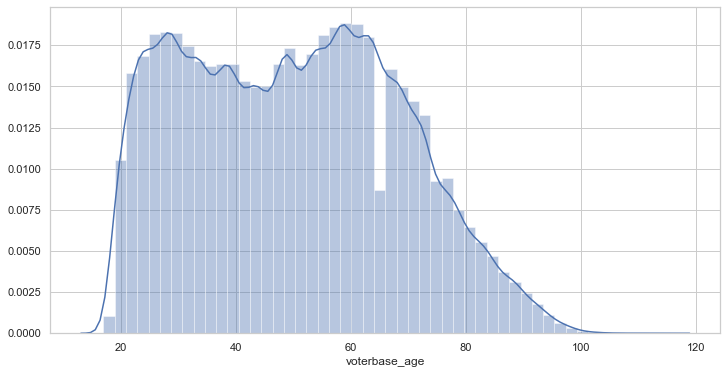

In [8]:
f, ax = plt.subplots(1, figsize=(12,6))
sns.distplot(vf.voterbase_age[vf.voterbase_age.notnull()])

Filling in null values with "Missing" for calculating proportions across the full population

In [9]:
for i in ['gender','race','marital_status','deceased_flag']:
    print('\nProportions by {}'.format(i))
    print(vf['voterbase_{}'.format(i)].fillna('Missing').value_counts(normalize=True))


Proportions by gender
Female     0.486867
Male       0.453746
Unknown    0.059387
Name: voterbase_gender, dtype: float64

Proportions by race
Caucasian           0.876057
African-American    0.092105
Uncoded             0.022166
Hispanic            0.006036
Asian               0.003513
Native American     0.000124
Name: voterbase_race, dtype: float64

Proportions by marital_status
Unmarried    0.503740
Married      0.442940
Unknown      0.053321
Name: voterbase_marital_status, dtype: float64

Proportions by deceased_flag
Missing     0.999471
Deceased    0.000529
Name: voterbase_deceased_flag, dtype: float64


In [10]:
for i in ['voter_status','absentee_status','g2018', 'g2016', 'p2018_party']:
    print('\nProportions by {}'.format(i))
    print(vf['vf_{}'.format(i)].fillna('Missing').value_counts(normalize=True))


Proportions by voter_status
Active      0.899237
Inactive    0.100763
Name: vf_voter_status, dtype: float64

Proportions by absentee_status
Missing    0.864488
Yes        0.135512
Name: vf_absentee_status, dtype: float64

Proportions by g2018
Y          0.582862
Missing    0.403435
Z          0.008625
R          0.002542
B          0.001558
F          0.000950
S          0.000028
Name: vf_g2018, dtype: float64

Proportions by g2016
Y          0.669586
Missing    0.294211
Z          0.026668
R          0.004481
B          0.002933
F          0.002094
S          0.000028
Name: vf_g2016, dtype: float64

Proportions by p2018_party
Missing    0.794933
R          0.111803
D          0.092745
G          0.000520
Name: vf_p2018_party, dtype: float64


count    760097.000000
mean         48.399587
std          38.356573
min           0.500000
25%           9.900000
50%          41.400000
75%          93.300000
max          99.900000
Name: tsmart_partisan_score, dtype: float64


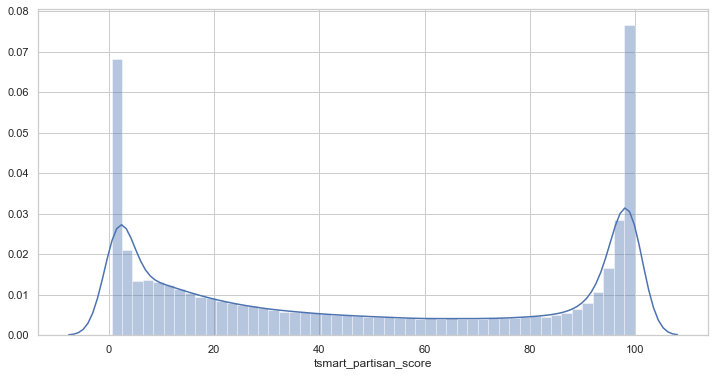

In [11]:
print(vf.tsmart_partisan_score.describe())
f, ax = plt.subplots(1, figsize=(12,6))
sns.distplot(vf.tsmart_partisan_score)

count    760097.000000
mean         74.766173
std          26.097281
min           1.100000
25%          55.000000
50%          87.600000
75%          96.600000
max          99.400000
Name: tsmart_presidential_general_turnout_score, dtype: float64


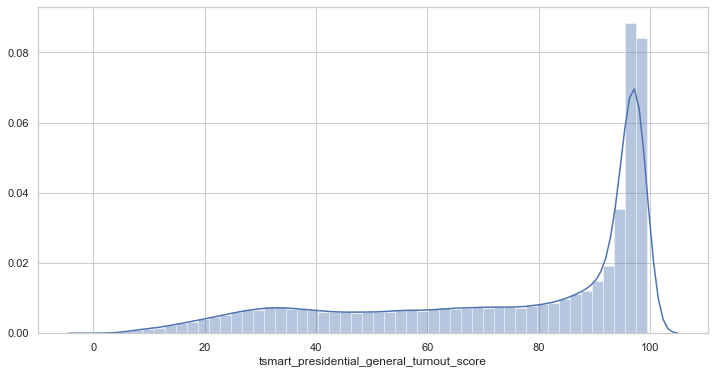

In [12]:
print(vf.tsmart_presidential_general_turnout_score.describe())
f, ax = plt.subplots(1, figsize=(12,6))
sns.distplot(vf.tsmart_presidential_general_turnout_score)

count    760097.000000
mean         53.346607
std          34.278661
min           0.400000
25%          20.100000
50%          58.400000
75%          87.400000
max          97.400000
Name: tsmart_midterm_general_turnout_score, dtype: float64


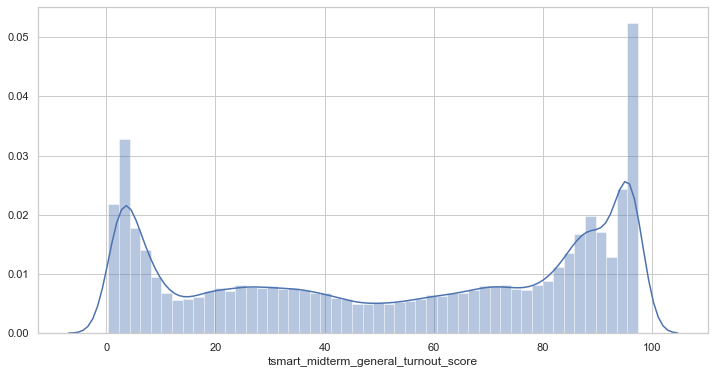

In [13]:
print(vf.tsmart_midterm_general_turnout_score.describe())
f, ax = plt.subplots(1, figsize=(12,6))
sns.distplot(vf.tsmart_midterm_general_turnout_score)

## Question 1: How do the 2016 and 2018 electorates vary in terms of demographics from the overall registered voter populations?

#### Flagging electorates in each year as well as those eligible (based on earliest registration date)

In [14]:
vf['voted16'] = (vf.vf_g2016.notnull())
vf['eligible16'] = (vf.vf_earliest_registration_date <= 20161108)
vf['voted18'] = (vf.vf_g2018.notnull())
vf['eligible18'] = (vf.vf_earliest_registration_date <= 20181106)

#### Calculating distributions for each demographic category

In [15]:
for i in ['gender','race','marital_status']:
    print('\nBy {}:'.format(i))
    x = pd.DataFrame()
    for j in ['voted16','eligible16','voted18','eligible18']:
        x[j] = vf.loc[vf[j],'voterbase_{}'.format(i)].value_counts(normalize=True).sort_index()
    print(x)


By gender:
          voted16  eligible16   voted18  eligible18
Female   0.512006    0.495024  0.503062    0.486324
Male     0.451911    0.457755  0.460482    0.455502
Unknown  0.036082    0.047222  0.036456    0.058174

By race:
                   voted16  eligible16   voted18  eligible18
African-American  0.077386    0.090700  0.073003    0.090368
Asian             0.003016    0.003138  0.003231    0.003490
Caucasian         0.897409    0.880237  0.903080    0.877808
Hispanic          0.004153    0.005834  0.003189    0.006152
Native American   0.000110    0.000124  0.000106    0.000124
Uncoded           0.017927    0.019966  0.017391    0.022058

By marital_status:
            voted16  eligible16   voted18  eligible18
Married    0.525248    0.460207  0.546172    0.445340
Unknown    0.040012    0.045799  0.035949    0.044108
Unmarried  0.434740    0.493994  0.417879    0.510551


#### Calculating distributions by age

In [16]:
for j in ['voted16','eligible16','voted18','eligible18']:
    print('Average age (current) for {} = {}'.format(j, np.round(vf[vf[j]].voterbase_age.mean(),1)))

Average age (current) for voted16 = 53.9
Average age (current) for eligible16 = 51.1
Average age (current) for voted18 = 54.7
Average age (current) for eligible18 = 49.6


## Question 2: Compare partisanship scores across Dem primary voters in 2018, Rep primary voters, and those who didn't vote in a primary

count    70495.000000
mean        79.656075
std         31.400597
min          0.700000
25%         64.700000
50%         98.800000
75%         99.300000
max         99.900000
Name: tsmart_partisan_score, dtype: float64


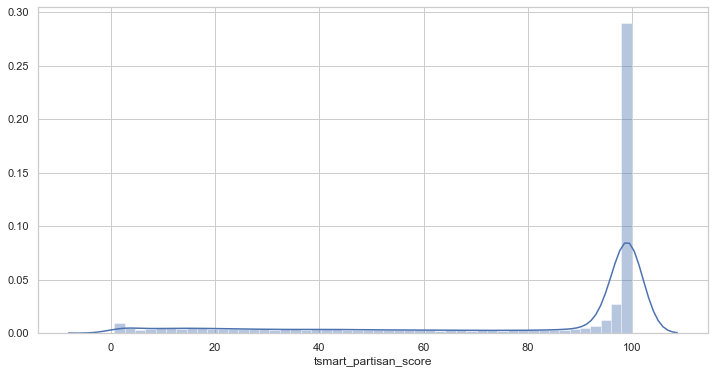

In [17]:
dem_voter_scores = vf[vf.vf_p2018_party=='D'].tsmart_partisan_score
print(dem_voter_scores.describe())
f, ax = plt.subplots(1, figsize=(12,6))
sns.distplot(dem_voter_scores)

count    84981.000000
mean        14.150463
std         22.809783
min          0.600000
25%          1.300000
50%          2.300000
75%         16.600000
max         99.700000
Name: tsmart_partisan_score, dtype: float64


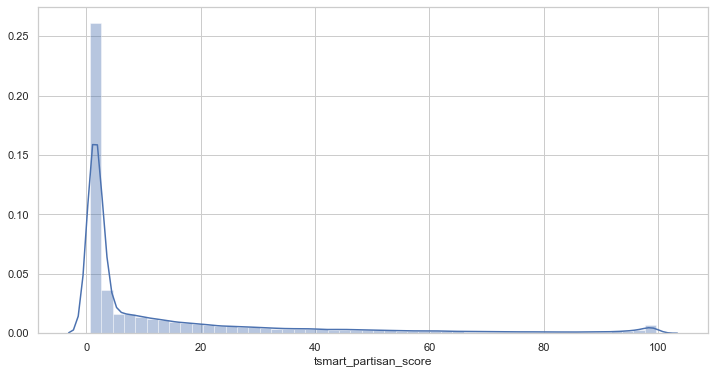

In [18]:
rep_voter_scores = vf[vf.vf_p2018_party=='R'].tsmart_partisan_score
print(rep_voter_scores.describe())
f, ax = plt.subplots(1, figsize=(12,6))
sns.distplot(rep_voter_scores)

count    604226.000000
mean         49.563015
std          37.163721
min           0.500000
25%          12.700000
50%          44.400000
75%          91.900000
max          99.900000
Name: tsmart_partisan_score, dtype: float64


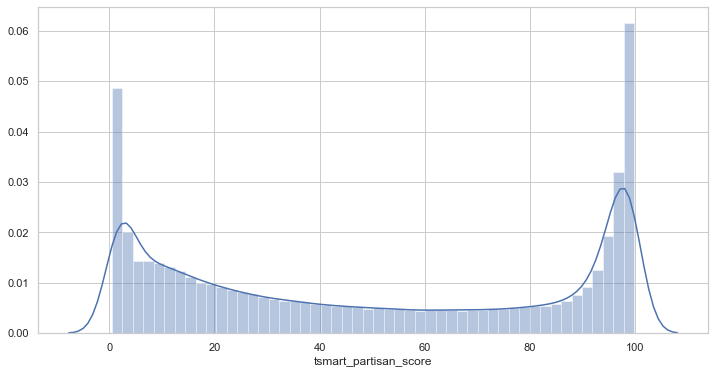

In [19]:
non_voter_scores = vf[vf.vf_p2018_party.isnull()].tsmart_partisan_score
print(non_voter_scores.describe())
f, ax = plt.subplots(1, figsize=(12,6))
sns.distplot(non_voter_scores)

## Question 3: How are partisanship scores correlated with demographics?

#### Splitting ages into groups

In [20]:
vf['voterbase_age_group'] = pd.qcut(vf.voterbase_age,5).astype(str)

#### Describing scores by group

In [21]:
for i in ['gender','race','marital_status','age_group']:
    print('\nBy {}:'.format(i))
    x = pd.DataFrame()
    for j in sorted(vf['voterbase_{}'.format(i)].unique()):
        x[j] = vf.loc[vf['voterbase_{}'.format(i)]==j,'tsmart_partisan_score'].describe()
    print(x)


By gender:
              Female           Male       Unknown
count  370066.000000  344891.000000  45140.000000
mean       52.479572      41.511753     67.577448
std        38.477440      37.359184     33.247574
min         0.600000       0.500000      0.600000
25%        12.500000       7.100000     38.800000
50%        51.900000      27.300000     82.600000
75%        95.700000      83.900000     97.100000
max        99.900000      99.900000     99.900000

By race:
       African-American        Asian      Caucasian     Hispanic  \
count      70009.000000  2670.000000  665888.000000  4588.000000   
mean          94.498537    60.929775      42.857654    81.939037   
std           13.904150    32.205449      36.807006    24.306787   
min            1.100000     0.900000       0.500000     0.800000   
25%           95.900000    32.500000       7.800000    79.800000   
50%           97.900000    68.500000      31.900000    92.100000   
75%           99.200000    91.300000      82.100000 

## Question 4: Graph new / updated registrations by month over the past 8 years

#### Extracting month and year from registration dates and limiting to last 8 years

In [22]:
reg_dates = vf.vf_registration_date.astype(str).map(lambda x: x[:6])
reg_dates = reg_dates[(reg_dates.astype(float) > 201107)]
reg_by_month = reg_dates.value_counts().sort_index()

#### Plotting registrations by month

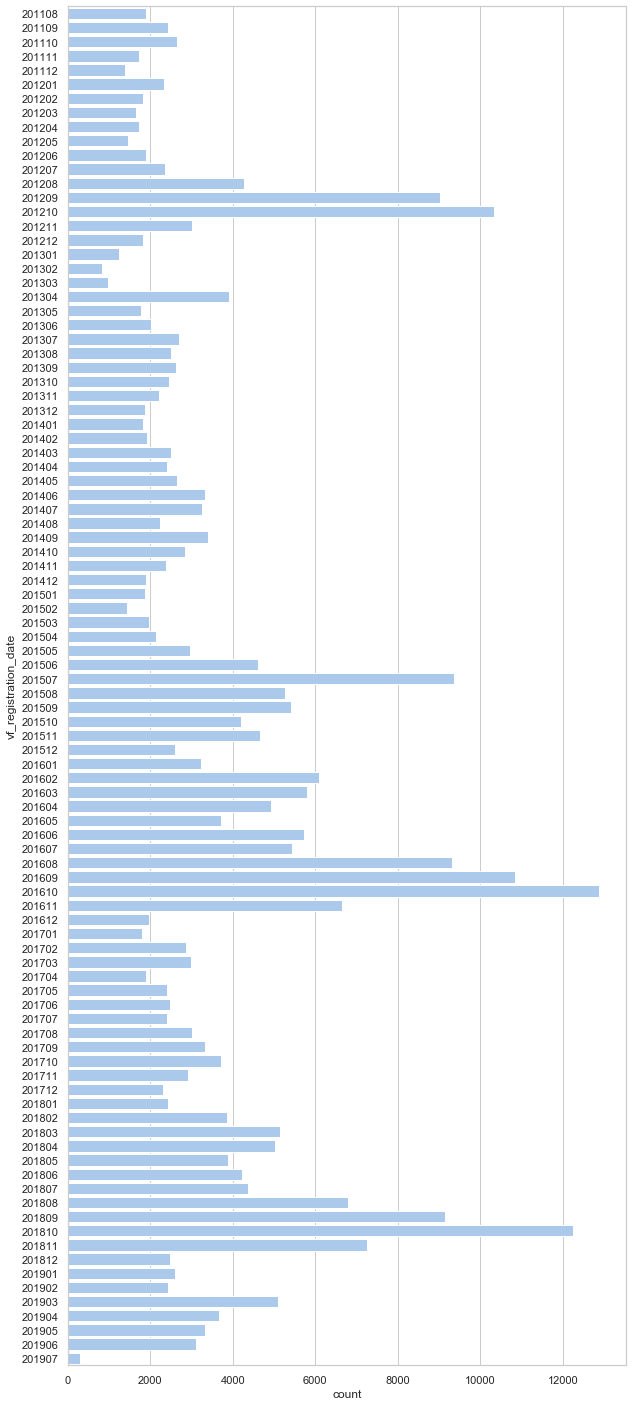

In [23]:
f, ax = plt.subplots(figsize=(10, 25))
sns.countplot(y=reg_dates, color='b')

## Question 5: How does the population of inactive registrants vary across counties?

#### Calculating percentage of inactives by county

In [24]:
inactive_pct_by_county = 100*(vf.vf_voter_status == 'Inactive').astype(int).groupby(
                        vf.vf_county_name).mean().sort_values(ascending=False)

#### Plotting across counties

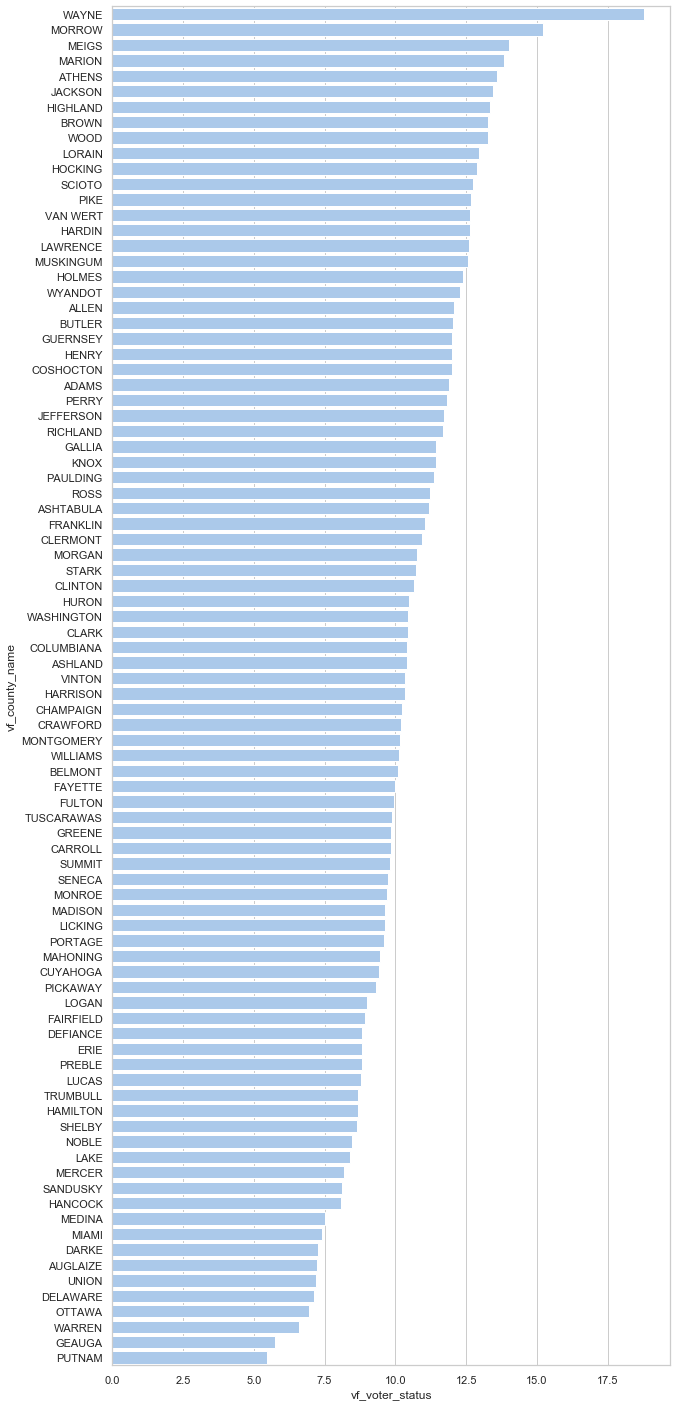

In [25]:
f, ax = plt.subplots(figsize=(10, 25))
sns.barplot(x=inactive_pct_by_county, y=inactive_pct_by_county.index, color='b')